In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs

In [4]:
np.random.seed(1)
B = np.array([[[ 7.11552733e-01+0.00000000e+00j,
         -1.11022302e-16+8.67679375e-19j,
          1.73472348e-18-7.69059865e-24j,
          6.59373578e-01+3.66277322e-03j],
        [-5.92149026e-02+2.99274422e-02j,
          5.87747175e-39+1.65377316e-50j,
          1.71056941e-49-4.32760500e-63j,
          4.83434024e-02+3.41562135e-02j],
        [ 6.72674804e-03+9.37205813e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          4.14466904e-03+9.43116726e-02j],
        [ 5.47635557e-03+5.26133490e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -5.32958328e-03-3.55864238e-03j],
        [-4.78890375e-02+1.21504560e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.64943962e-02+1.16621786e-01j],
        [ 1.16631420e-02-7.86673852e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -3.67444298e-03+1.63438748e-03j],
        [-6.07779169e-03-2.05248487e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.29313997e-03+1.51253157e-03j],
        [-4.33794282e-03-4.94320827e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.13611638e-03-4.68339056e-03j]],

       [[-5.48548579e-01+0.00000000e+00j,
          0.00000000e+00+1.17126022e-16j,
         -2.22044605e-16-1.01743215e-19j,
          5.77536907e-01+4.44841754e-02j],
        [ 3.80189424e-01+1.32416139e-02j,
         -1.57772181e-30+5.39533540e-40j,
         -2.93873588e-39-1.06545171e-50j,
          4.01533528e-01+7.00854950e-02j],
        [ 2.63427282e-02-4.87585285e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          3.19891695e-02+1.07997093e-01j],
        [-3.37459859e-02-3.28797282e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.07927658e-02-3.00888997e-02j],
        [ 3.21560522e-02-7.99811187e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -5.31876519e-02+1.14112021e-01j],
        [-5.65819411e-02+3.35528557e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -5.39640137e-02+3.04207043e-02j],
        [ 1.21765942e-02+1.48714980e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          8.39649376e-03+1.45697611e-02j],
        [ 1.20484752e-03+4.47318953e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.85985461e-03-3.92033456e-03j]],

       [[ 3.39350933e-01+0.00000000e+00j,
         -1.38777878e-15-1.06079696e-15j,
          0.00000000e+00-8.77797184e-17j,
         -3.51729246e-01+1.47406597e-01j],
        [ 4.66073569e-01-3.13994071e-02j,
          0.00000000e+00+2.09048140e-29j,
         -1.00974196e-28-2.17833797e-37j,
          5.00553394e-01-6.01698465e-02j],
        [ 3.36721857e-01-5.10354919e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          3.36859120e-01-1.05810150e-01j],
        [-2.63942839e-02-3.55850109e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -5.66417631e-02+7.34673492e-03j],
        [-8.83717935e-03+7.91575976e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.27607677e-02-4.92128901e-02j],
        [-4.87403335e-02+5.32977733e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -5.19725643e-02+5.35199320e-02j],
        [-2.98767976e-02+3.81983369e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.72398777e-02+2.88221684e-02j],
        [-1.62826133e-02+1.00711507e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -5.86932823e-03+1.09640357e-02j]],

       [[-8.17474475e-02+0.00000000e+00j,
          4.67681449e-15+3.66770687e-15j,
          5.55111512e-17+7.48912651e-16j,
          3.40619437e-02+7.82000699e-02j],
        [-3.20293913e-01+5.27311699e-01j,
          0.00000000e+00-2.35746475e-23j,
          0.00000000e+00+4.78246924e-30j,
          3.34070118e-01-4.73701685e-01j],
        [-1.80772063e-01+2.48427360e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.41849156e-01-2.50865839e-01j],
        [ 1.12324750e-01+1.32898772e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.61516208e-03+1.77860125e-01j],
        [-2.37682436e-02-1.90474086e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          8.79886449e-03+1.14403445e-02j],
        [-2.08830812e-02-1.20644189e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.71873372e-04+6.55875136e-02j],
        [-2.42286445e-02-8.41347802e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.20242958e-02-1.78219515e-02j],
        [ 2.62115196e-03-3.72506452e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          3.50429559e-03-8.43002512e-03j]],

       [[ 1.85831985e-01+0.00000000e+00j,
          3.34454686e-14-2.04986852e-14j,
          7.77156117e-16-6.47980543e-15j,
         -9.50458173e-02-1.84891755e-01j],
        [ 2.36778298e-01+1.32274123e-01j,
          0.00000000e+00+8.25857124e-20j,
          4.33680869e-19-9.05698147e-24j,
          2.71831437e-01+1.14418678e-01j],
        [-4.95070472e-01-2.29456485e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -5.15232022e-01-2.86174613e-01j],
        [-5.25905349e-02-4.92598344e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          2.38287407e-02-7.84364262e-02j],
        [-1.63309933e-01-1.18848693e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.21100155e-01-1.65549841e-01j],
        [-4.60668610e-02+9.65810842e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -6.98850763e-02-1.08481385e-02j],
        [ 7.84235088e-02+3.54793487e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          4.81101507e-02+4.39887888e-02j],
        [ 4.04982105e-02-3.04373045e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          3.58913096e-02-2.38550423e-03j]],

       [[-8.65249007e-02+0.00000000e+00j,
          1.37390099e-13+5.63882776e-13j,
          1.00475184e-14-9.35850450e-15j,
          6.51957582e-02-4.90717714e-02j],
        [-4.75410615e-02-3.43328496e-01j,
         -5.55111512e-17+1.68051337e-17j,
          1.11022302e-16-5.59571141e-20j,
          1.52782117e-01+2.76702132e-01j],
        [ 1.48406116e-01+4.42484861e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.79965406e-01-4.19220985e-01j],
        [ 2.59531661e-01+1.97128276e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          3.00297310e-01+7.10338437e-02j],
        [ 1.69077399e-02+1.83276746e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.96132683e-03-1.51409499e-01j],
        [ 4.55814598e-02-5.96257549e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.64341368e-02-1.37875147e-01j],
        [-1.26451193e-01-1.59358485e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -9.11240093e-02-2.57984597e-02j],
        [-4.31508701e-02-4.98533061e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          6.84582270e-03-7.04749064e-03j]],

       [[ 7.10057388e-02+0.00000000e+00j,
          1.73440429e-12-7.44060960e-12j,
         -3.57769370e-13-3.33460879e-13j,
         -6.80171127e-02+3.56950863e-03j],
        [ 1.18925454e-01+9.38733565e-03j,
          3.33066907e-16+8.55218674e-16j,
         -5.55111512e-17-4.41134759e-17j,
          5.50440743e-02-3.72731612e-02j],
        [-6.36699976e-02-4.05796523e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.30580337e-03+3.39262382e-01j],
        [ 4.28289596e-01+2.96109113e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          3.65806691e-01+3.05122089e-01j],
        [ 1.34768072e-02-8.90037657e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -3.49315615e-02+1.11427599e-01j],
        [-2.45447694e-02-1.63046094e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.43486024e-02-1.32747186e-01j],
        [-8.05722175e-02-1.84416917e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -9.12368105e-02-2.58506034e-01j],
        [-4.51405770e-03-4.41030566e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -3.58596221e-02-6.45016325e-02j]],

       [[-8.15245323e-03+0.00000000e+00j,
         -6.01975067e-13+8.64628009e-12j,
         -1.34787841e-12+3.03757575e-13j,
         -1.17111692e-02-2.17000958e-03j],
        [-1.07348247e-01+7.66441161e-03j,
          6.44276299e-15+3.17996497e-15j,
          3.46944695e-16+1.87566976e-17j,
          1.06435072e-01-6.37649368e-03j],
        [ 3.34755348e-02+7.40482561e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.04528438e-02+2.79999624e-02j],
        [-4.28480817e-01-3.92525624e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          4.57375109e-01+4.35901663e-01j],
        [ 3.42161330e-03-3.29001451e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -2.00477978e-02+3.14716371e-02j],
        [-9.70588270e-03+1.66790363e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.47196712e-03-1.83463089e-01j],
        [ 9.31278661e-02+2.46187369e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.01138822e-01-2.75350617e-01j],
        [-1.38495622e-03+9.99646962e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -3.94293507e-02-3.27872482e-02j]]])


B1=np.array([[[-6.85211139e-01+0.00000000e+00j,
         -3.33066907e-16-1.46801398e-19j,
          0.00000000e+00+6.27009367e-24j,
         -6.33818888e-01-5.75225172e-03j],
        [ 6.87126385e-02-4.16917432e-02j,
         -1.17549435e-38+2.91331353e-49j,
          0.00000000e+00-1.92190291e-62j,
         -3.65325823e-02-4.83527587e-02j],
        [-1.14551963e-02-1.37538276e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.10777400e-02-1.38143330e-01j],
        [ 8.07524633e-03+8.72165801e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -8.82648926e-03-1.41438170e-03j],
        [-1.15065377e-01+1.67567043e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.11609354e-01+1.59154933e-01j],
        [ 2.22334014e-02-7.92195711e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -2.31199896e-03+9.92717010e-04j],
        [-8.94140680e-03-3.81002512e-04j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.02183584e-03+5.62357305e-03j],
        [ 9.17830845e-03+9.19249001e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          9.04623324e-03+9.27629333e-03j]],

       [[ 5.29219546e-01+0.00000000e+00j,
          1.66533454e-16-1.80274022e-17j,
          1.11022302e-16+1.26075560e-19j,
         -5.50078616e-01-6.44017893e-02j],
        [-3.77165898e-01-2.27497951e-02j,
          6.31088724e-30+5.95782781e-39j,
          1.17549435e-38-5.88843475e-50j,
         -3.78242249e-01-1.01523809e-01j],
        [-3.27568910e-02+7.15311881e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.21146729e-02-1.57971185e-01j],
        [-5.30577697e-02-3.99816323e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -6.22463926e-02-3.27094111e-02j],
        [ 7.71922263e-02-1.13144218e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.24517775e-01+1.45529000e-01j],
        [-9.11164422e-02+2.88904474e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -8.10658878e-02+2.51916897e-02j],
        [ 2.79873637e-02+2.30058656e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          2.50934709e-02+2.79671145e-02j],
        [-3.20988771e-03-6.09264104e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.03127833e-02+1.02586380e-02j]],

       [[-3.33406926e-01+0.00000000e+00j,
         -1.88737914e-15+3.41876050e-16j,
          1.11022302e-16+5.86824426e-17j,
          3.16767841e-01-2.10793908e-01j],
        [-4.47080085e-01+4.22748385e-02j,
          2.11758237e-22+1.97412442e-28j,
          0.00000000e+00-2.95342956e-37j,
         -4.85407130e-01+8.58314693e-02j],
        [-3.48662371e-01+1.42650120e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -3.18578037e-01+1.58062831e-01j],
        [-4.62220973e-02-2.46616026e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -6.58513660e-02+1.95989872e-02j],
        [-4.07193955e-02+1.10141982e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.69728187e-02-8.50465006e-02j],
        [-6.49914685e-02+6.13879666e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -7.54089171e-02+6.19364313e-02j],
        [-1.58212289e-02+5.09048761e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -3.77508251e-03+3.49997704e-02j],
        [ 2.08927996e-02-1.18353435e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          3.67578210e-03-1.42399672e-02j]],

       [[ 1.10489693e-01+0.00000000e+00j,
         -6.98052727e-15+4.16615527e-15j,
         -6.93889390e-16+1.07117142e-15j,
         -7.55807727e-02-8.12410787e-02j],
        [ 2.31653812e-01-5.49712289e-01j,
          6.93889390e-18+7.32882023e-22j,
          0.00000000e+00-1.29373188e-28j,
         -2.68457935e-01+4.97841603e-01j],
        [ 1.54126202e-01-2.79749042e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -9.46722607e-02+2.77349491e-01j],
        [ 1.57386308e-01+6.80786759e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          4.35340287e-02+1.78468944e-01j],
        [-2.00631728e-02-3.34028233e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -3.16950587e-03+2.21213307e-02j],
        [-3.30466912e-02-1.54468219e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -8.01199183e-03+9.17286419e-02j],
        [-6.45117868e-02-7.42091103e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.78061818e-02-3.60302988e-02j],
        [ 2.07638310e-03+4.29727898e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.12192342e-03+8.95334398e-03j]],

       [[-2.08340605e-01+0.00000000e+00j,
         -9.35362898e-15-5.67734878e-14j,
          3.10862447e-15+3.23639769e-15j,
          1.38354054e-02+2.39362817e-01j],
        [-1.97176283e-01-1.72925076e-01j,
         -1.11022302e-16+6.76779325e-19j,
          8.67361738e-19-4.51071928e-24j,
         -2.48191847e-01-1.56081282e-01j],
        [ 4.35480945e-01+2.94075019e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          4.31689375e-01+3.65265335e-01j],
        [-5.29293525e-02-8.54189646e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          2.13911564e-02-1.10312688e-01j],
        [-1.27005929e-01-1.61533890e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -3.33649906e-02-1.87802182e-01j],
        [-7.65392577e-02-2.65363174e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.00470890e-01-5.14176303e-02j],
        [ 8.25112503e-02+8.20386223e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          4.65708035e-02+8.83206883e-02j],
        [-4.83439476e-02+6.32147252e-04j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.46090238e-02-9.64010895e-04j]],

       [[ 1.27973181e-01+0.00000000e+00j,
          2.49647525e-13-4.91699455e-13j,
          1.32116540e-14-1.75529621e-14j,
         -1.06999318e-01+4.95125155e-02j],
        [-1.79335960e-02+3.41743322e-01j,
         -5.55111512e-17+1.16660154e-16j,
          0.00000000e+00-1.33195931e-19j,
         -1.40998532e-01-2.80918097e-01j],
        [-9.17832545e-02-4.36703008e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.57391231e-01+4.10746378e-01j],
        [ 2.29890375e-01+2.16297399e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          2.98391994e-01+3.15675243e-02j],
        [-2.86759785e-02+1.88659118e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          3.23158896e-02-1.31779851e-01j],
        [ 4.81330231e-02-2.30377156e-03j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.89188487e-02-1.72890367e-01j],
        [-1.24132387e-01-2.12690180e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.24914904e-01-1.20709636e-02j],
        [ 4.38568651e-02+5.80577330e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.83448374e-02+8.54549926e-03j]],

       [[-1.02714008e-01+0.00000000e+00j,
         -5.28670163e-12-4.38488129e-12j,
          2.00645056e-13-1.45288864e-13j,
          1.03521230e-01-2.56701452e-04j],
        [-1.62546856e-01-1.08093223e-02j,
          1.38777878e-15-6.82180007e-16j,
          1.11022302e-16-4.48859699e-17j,
         -7.42624605e-02+3.76842380e-02j],
        [ 8.74223541e-02+3.94907223e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          2.76659764e-02-3.28018612e-01j],
        [ 4.39309812e-01+2.20711158e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          3.62564792e-01+2.59270115e-01j],
        [ 1.46543344e-02-6.23272900e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -5.94810320e-02+1.11605448e-01j],
        [-5.17547352e-02-1.75710823e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -3.50331275e-02-1.16885781e-01j],
        [-1.38302759e-01-1.88251208e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -1.31522588e-01-2.88828657e-01j],
        [-2.24131224e-03+4.91833426e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          3.55372563e-02+7.35805698e-02j]],

       [[-9.70005632e-03+0.00000000e+00j,
          2.06274824e-11+3.13786684e-11j,
          2.23581743e-12+1.22374067e-12j,
         -1.96452238e-02-7.33469775e-03j],
        [-1.46511464e-01-1.37758667e-02j,
          2.22738494e-15-5.65519853e-15j,
         -3.26128013e-16-3.71122404e-16j,
          1.44096442e-01+1.33924780e-02j],
        [ 5.56660124e-02+8.22364479e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -7.65381299e-02+1.58949880e-02j],
        [ 4.01475514e-01+3.68741044e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -4.28908258e-01-4.13161547e-01j],
        [-1.69514089e-02+1.80065208e-02j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          4.21034127e-02-4.05270847e-02j],
        [ 3.57542358e-03-1.65677930e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          8.20638787e-03+1.82629069e-01j],
        [-1.14071746e-01-2.85391585e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          1.18505723e-01+3.19023494e-01j],
        [-1.02344397e-02+1.07529302e-01j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -2.04515075e-02-4.24592475e-02j]]])

In [4]:
trans = funcs.single_trans(h1=0.4,h2=0)

In [5]:
B = funcs.col_contract34(B,trans)

In [13]:
B1.shape

(8, 8, 4)

In [7]:
MPS = iMPS.iMPS()
MPS.construct_from_tensor_list([B,B1])
#MPS.cell_canonical()
MPS.site_canonical()

In [10]:
strap4 = iMPS.strap(MPS,None,MPS)
strap4.calculate_eig()

(1-8.604228440844963e-16j)

In [7]:
trans = funcs.col_contract33(B,B)

In [9]:
lam,v = np.linalg.eig(trans.conj().transpose())
lam

array([1.        +2.84678704e-21j, 0.70727974+1.05479762e-17j,
       0.63381977+8.58626453e-17j, 0.45051152-2.62890063e-19j,
       0.34508954-1.22995879e-17j, 0.2886421 +1.29879765e-17j,
       0.24528558+5.69001095e-18j, 0.21980952-4.06465614e-18j,
       0.20516335-3.51068346e-18j, 0.04509686-4.50489903e-17j,
       0.10010145+4.10356589e-19j, 0.07079974+1.23547959e-18j,
       0.06344627-1.46658151e-18j, 0.18385451+3.32950819e-18j,
       0.15546686-1.01865302e-17j, 0.13003657+1.76781766e-17j])

In [27]:
vl = v[:,0].reshape([4,4])
vl = vl/np.linalg.norm(vl)
print(vl)
(np.linalg.eigvals(vl))

[[ 9.99962576e-01+0.00000000e+00j  4.51865377e-08+4.15050528e-06j
   8.60787464e-08+1.14577779e-06j -4.38307491e-08-4.74322347e-06j]
 [ 4.51865377e-08-4.15050528e-06j  8.65136846e-03+2.42018773e-21j
  -6.91801815e-08-1.08190019e-06j -3.85535912e-11+9.90685557e-09j]
 [ 8.60787464e-08-1.14577779e-06j -6.91801815e-08+1.08190019e-06j
   1.92580029e-05-1.14613924e-22j -1.05302287e-12-8.61102051e-11j]
 [-4.38307491e-08+4.74322347e-06j -3.85535912e-11-9.90685557e-09j
  -1.05302287e-12+8.61102051e-11j  1.66635672e-07-9.51839228e-25j]]


array([9.99962576e-01+3.86370533e-24j, 8.65136858e-03+6.02352569e-19j,
       1.66613159e-07-8.52384134e-19j, 1.92578654e-05+3.34730996e-19j])

In [28]:
MPS.s[0]

array([9.95692435e-01, 9.26138080e-02, 4.36955697e-03, 4.06432083e-04])

In [5]:
transr = MPS.transfer_matrix('left')
transr

<16x16 _CustomLinearOperator with dtype=complex128>

In [6]:
lam,v = np.linalg.eig(transr.adjoint().dot(np.eye(16)))
lam

array([1.        -1.00117480e-19j, 0.70727974+2.86149327e-17j,
       0.63381977-7.93495669e-17j, 0.45051151+4.03739840e-18j,
       0.34508953-1.37684924e-17j, 0.04509686-2.99567295e-17j,
       0.2886421 +3.43135922e-19j, 0.24528558-1.48592709e-17j,
       0.21980952+9.62795668e-18j, 0.20516335+6.16247348e-18j,
       0.10010145+1.33099857e-17j, 0.07079974+3.69604559e-17j,
       0.06344627+1.89882906e-17j, 0.18385451+5.51013972e-17j,
       0.15546686-4.37924126e-17j, 0.13003657-2.75588944e-17j])

In [7]:
v[:,0]

array([ 5.00000000e-01+7.48501221e-18j, -6.68979739e-15+2.61443436e-15j,
        3.12522968e-14-5.47590499e-15j,  1.31143152e-13-2.17270073e-14j,
       -6.67539092e-15-2.65100058e-15j,  5.00000000e-01+0.00000000e+00j,
       -1.80447764e-14-1.24265782e-14j, -2.07629437e-14-1.40458014e-14j,
        3.11543940e-14+5.52925474e-15j, -1.81068863e-14+1.24647184e-14j,
        5.00000000e-01-2.64399040e-18j, -1.70901545e-14-5.77158996e-15j,
        1.31121392e-13+2.17317992e-14j, -2.07248563e-14+1.41039244e-14j,
       -1.70960609e-14+5.73350874e-15j,  5.00000000e-01-1.27168543e-17j])

In [30]:
np.linalg.norm(transr.rmatvec(np.eye(4).reshape([4*4,])).reshape([4,4])-np.eye(4))

0.052149779923229986

In [36]:
MPS.s[0]

array([9.95692435e-01, 9.26138080e-02, 4.36955697e-03, 4.06432083e-04])

In [47]:
transl=MPS.transfer_matrix('left')

In [49]:
lam,v = np.linalg.eig(transl.adjoint().dot(np.eye(36)))

In [50]:
lam

array([1.        +2.01297877e-21j, 0.489024  +3.43074847e-20j,
       0.42154755-3.39088121e-17j, 0.26610271-5.05416358e-20j,
       0.2261125 +1.63733953e-19j, 0.18271255-5.54214031e-20j,
       0.24613795-6.50315996e-17j, 0.12928464-2.03136950e-19j,
       0.17949505+3.98108258e-17j, 0.11706377+3.08725320e-19j,
       0.13805943+2.64855994e-17j, 0.09196867-1.93299031e-18j,
       0.07359553+4.56080312e-18j, 0.11048235+2.74909780e-17j,
       0.09106315-4.90878296e-17j, 0.06389378-4.07944876e-18j,
       0.05561117-2.60330639e-17j, 0.0041902 +2.19438896e-20j,
       0.05137015+3.03664776e-19j, 0.06483084-6.23856422e-18j,
       0.03649309+2.49335027e-19j, 0.03193065+9.73047248e-18j,
       0.00759799-7.39149831e-19j, 0.01251902+4.24574012e-18j,
       0.01376295+4.52875340e-18j, 0.01631129-6.34665536e-18j,
       0.02157819-3.98080820e-18j, 0.05045481-8.63954001e-18j,
       0.05103947+3.14056064e-17j, 0.02901639+2.82976743e-18j,
       0.00756591+5.95054602e-18j, 0.01051414-1.4299283

In [51]:
v[:,0]

array([ 4.08249650e-01+3.71363379e-20j,  1.29121117e-15+1.12031217e-16j,
       -1.16741143e-14+2.55826761e-15j,  5.01687716e-14-1.57501930e-16j,
        2.64588236e-12-3.44969660e-14j,  1.44625776e-11-6.18190314e-14j,
        1.30164361e-15-1.12025367e-16j,  4.08249650e-01+2.35838008e-20j,
        6.73997663e-13-8.23766692e-15j,  3.98030983e-13-1.80474728e-14j,
       -2.90288071e-11+8.55734450e-13j,  4.85232434e-13+3.46868095e-13j,
       -1.16219323e-14-2.55825389e-15j,  6.74034908e-13+8.23764977e-15j,
        4.08249650e-01+0.00000000e+00j,  1.82135445e-11-5.17240091e-13j,
        2.03822843e-09+2.76105392e-11j,  5.21361838e-09-1.78903633e-11j,
        5.01421750e-14+1.57497784e-16j,  3.97993597e-13+1.80474590e-14j,
        1.82135615e-11+5.17240096e-13j,  4.08249650e-01+6.43392897e-20j,
       -7.91228137e-10-2.10265955e-11j, -3.74963089e-08-9.72737780e-11j,
        2.64584214e-12+3.44970089e-14j, -2.90288696e-11-8.55734460e-13j,
        2.03822870e-09-2.76105391e-11j, -7.91228140

In [52]:
transr=MPS.transfer_matrix('right')

In [54]:
lam,v = np.linalg.eig(transl.adjoint().dot(np.eye(36)))

In [55]:
v[:,0]

array([ 4.08249650e-01+3.71363379e-20j,  1.29121117e-15+1.12031217e-16j,
       -1.16741143e-14+2.55826761e-15j,  5.01687716e-14-1.57501930e-16j,
        2.64588236e-12-3.44969660e-14j,  1.44625776e-11-6.18190314e-14j,
        1.30164361e-15-1.12025367e-16j,  4.08249650e-01+2.35838008e-20j,
        6.73997663e-13-8.23766692e-15j,  3.98030983e-13-1.80474728e-14j,
       -2.90288071e-11+8.55734450e-13j,  4.85232434e-13+3.46868095e-13j,
       -1.16219323e-14-2.55825389e-15j,  6.74034908e-13+8.23764977e-15j,
        4.08249650e-01+0.00000000e+00j,  1.82135445e-11-5.17240091e-13j,
        2.03822843e-09+2.76105392e-11j,  5.21361838e-09-1.78903633e-11j,
        5.01421750e-14+1.57497784e-16j,  3.97993597e-13+1.80474590e-14j,
        1.82135615e-11+5.17240096e-13j,  4.08249650e-01+6.43392897e-20j,
       -7.91228137e-10-2.10265955e-11j, -3.74963089e-08-9.72737780e-11j,
        2.64584214e-12+3.44970089e-14j, -2.90288696e-11-8.55734460e-13j,
        2.03822870e-09-2.76105391e-11j, -7.91228140

In [56]:
MPS.s[0]

array([9.98708577e-01, 5.08021081e-02, 5.68732567e-04, 2.82208719e-05,
       9.47005497e-07, 2.89865804e-08])

In [10]:
MPS.cell_canonical()

In [11]:
MPS.check_canonical_unit_cell()

In [70]:
M= np.array([[ 2.03478583e+00+0.00000000e+00j,  3.37724742e-16+4.66749035e-17j,
         2.48295172e-15-2.10579167e-16j,  1.64293899e-16-2.40150781e-16j,
         2.43295306e-15-2.19225679e-16j, -7.12291181e-17-3.93023288e-18j,
         1.13994202e-15-9.67650439e-17j,  4.01909341e-15+1.25767452e-17j],
       [ 3.37724742e-16-4.66749035e-17j,  2.03478583e+00+0.00000000e+00j,
         4.69191667e-16+1.75017336e-16j, -1.99861193e-15+1.10588622e-17j,
         1.10091921e-15+1.84314369e-17j, -1.53144912e-15-1.18394877e-16j,
        -5.30269730e-16+1.91253263e-16j,  3.89981168e-15-5.54975987e-18j],
       [ 2.48295172e-15+2.10579167e-16j,  4.69191667e-16-1.75017336e-16j,
         2.03478583e+00+0.00000000e+00j, -1.02872024e-15+3.26751430e-17j,
        -5.00884463e-17-1.24683250e-17j, -7.24708261e-16+1.05980762e-16j,
         1.97035195e-15+2.47740196e-16j,  2.29696870e-15+5.12827628e-17j],
       [ 1.64293899e-16+2.40150781e-16j, -1.99861193e-15-1.10588622e-17j,
        -1.02872024e-15-3.26751430e-17j,  2.03478583e+00+0.00000000e+00j,
        -1.76318378e-15+3.66460334e-17j,  3.85692726e-15+1.62955587e-16j,
         1.27760182e-15-9.74426703e-17j,  1.38887654e-15+4.94396191e-17j],
       [ 2.43295306e-15+2.19225679e-16j,  1.10091921e-15-1.84314369e-17j,
        -5.00884463e-17+1.24683250e-17j, -1.76318378e-15-3.66460334e-17j,
         2.03478583e+00+0.00000000e+00j,  5.60990768e-16-2.84603070e-17j,
         2.57196472e-16+3.27429056e-17j,  5.45718256e-15+2.47198095e-17j],
       [-7.12291181e-17+3.93023288e-18j, -1.53144912e-15+1.18394877e-16j,
        -7.24708261e-16-1.05980762e-16j,  3.85692726e-15-1.62955587e-16j,
         5.60990768e-16+2.84603070e-17j,  2.03478583e+00+0.00000000e+00j,
        -1.88913758e-16-2.54570670e-16j,  1.55115450e-16-3.94649591e-17j],
       [ 1.17257058e-15+9.69276742e-17j, -5.20322175e-16-1.92554306e-16j,
         1.95235292e-15-2.47306516e-16j,  1.27289422e-15+9.71716197e-17j,
         2.53893044e-16-3.30681663e-17j, -2.06428706e-16+2.54462250e-16j,
         2.03478583e+00+0.00000000e+00j, -8.96482561e-15-8.59772323e-17j],
       [ 3.97624709e-15-1.30104261e-17j,  3.95906919e-15+5.30067924e-18j,
         2.39404037e-15-5.11743425e-17j,  1.34232360e-15-4.96564595e-17j,
         5.46503625e-15-2.38524478e-17j,  1.17005743e-16+3.79470760e-17j,
        -8.96482561e-15+8.59772323e-17j,  2.03478583e+00+0.00000000e+00j]])

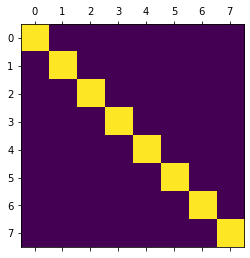

In [73]:
pyplot.matshow(abs(M/M[0,0]))